<a href="https://colab.research.google.com/github/pathakadithi/Titanic-Project/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import io
import pandas as pd
from google.colab import files


uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))



Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [9]:
print("Shape:", df.shape)
display(df.head())
print("\nInfo:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
display(df.describe(include='all'))

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df['Cabin'] = df['Cabin'].fillna('Missing')

In [13]:
print("\nMissing after simple imputation:\n", df.isnull().sum())


Missing after simple imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
HasCabin       0
dtype: int64


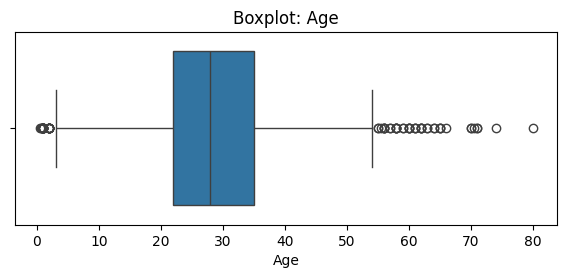

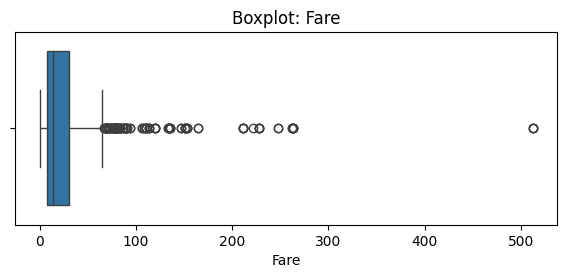

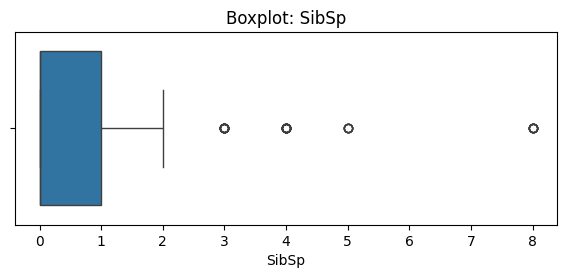

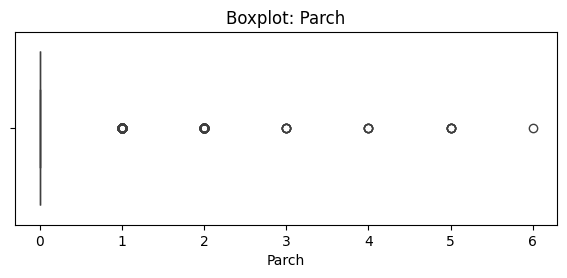

In [14]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in num_cols:
    plt.figure(figsize=(7,2.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

In [15]:
def remove_outliers_iqr(df_in, cols, k=1.5):
    df_out = df_in.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        # keep rows within bounds
        df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]
    return df_out

In [16]:
df_no_outliers = remove_outliers_iqr(df, ['Fare', 'Age'], k=1.5)
print("Before removing outliers:", df.shape, "After:", df_no_outliers.shape)

Before removing outliers: (891, 13) After: (708, 13)


In [17]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [18]:
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=True)

In [19]:
cols_to_drop = ['Name','Ticket','PassengerId','Cabin']
for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=c)

In [20]:
print("Columns after encoding/drop:", df.columns.tolist())

Columns after encoding/drop: ['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']


In [21]:
#Standardizing the numerical features
scaler = StandardScaler()
numeric_to_scale = ['Age','Fare','SibSp','Parch']  # adapt if you dropped/renamed columns
for col in numeric_to_scale:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

display(df.head())

,Survived,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0,-0.565736,0.432793,-0.473674,-0.502445,0,False,True,False,True
1,1,1,0.663861,0.432793,-0.473674,0.786845,1,False,False,False,False
2,1,1,-0.258337,-0.474545,-0.473674,-0.488854,0,False,True,False,True
3,1,1,0.433312,0.432793,-0.473674,0.420730,1,False,True,False,False
4,0,0,0.433312,-0.474545,-0.473674,-0.486337,0,False,True,False,True


In [22]:
if 'Survived' in df.columns:
    X = df.drop(columns=['Survived'])
    y = df['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify=y)
    print("Train/test shapes:", X_train.shape, X_test.shape)
    # If you want to remove outliers from train only:
    train = pd.concat([X_train, y_train], axis=1)
    train_clean = remove_outliers_iqr(train, ['Fare','Age'], k=1.5)
    X_train_clean = train_clean.drop(columns=['Survived'])
    y_train_clean = train_clean['Survived']
    print("After outlier removal (train):", X_train_clean.shape)


Train/test shapes: (712, 10) (179, 10)
After outlier removal (train): (566, 10)


In [25]:
numeric_cols_pipeline = [c for c in X_train_clean.columns if c in ['Age','Fare','SibSp','Parch']]
categorical_cols_pipeline = [c for c in X_train_clean.columns if c not in numeric_cols_pipeline]
numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_cols_pipeline),
        ('cat', categorical_transformer, categorical_cols_pipeline)
    ])
    # Fit on train_clean, transform train and test:
X_train_prepared = preprocessor.fit_transform(X_train_clean)
X_test_prepared = preprocessor.transform(X_test)
print("Prepared shapes (train/test):", X_train_prepared.shape, X_test_prepared.shape)

Prepared shapes (train/test): (566, 16) (179, 16)


In [27]:
numeric_cols = numeric_cols_pipeline


categorical_cols = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols_pipeline)

# Combine all column names
all_columns = list(numeric_cols) + list(categorical_cols)

In [28]:


# Training data
X_train_df = pd.DataFrame(X_train_prepared, columns=all_columns)

# Test data
X_test_df = pd.DataFrame(X_test_prepared, columns=all_columns)

# Quick view
X_train_df.head()


,Age,SibSp,Parch,Fare,Sex_0,Sex_1,HasCabin_0,HasCabin_1,Embarked_Q_0,Embarked_Q_1,Embarked_S_0,Embarked_S_1,Pclass_2_0,Pclass_2_1,Pclass_3_0,Pclass_3_1
0,-0.022228,-0.468468,-0.403367,2.870530,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-0.022228,-0.468468,-0.403367,-1.262636,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-1.053448,-0.468468,0.804599,-0.578601,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.287138,0.709990,0.804599,0.657783,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-0.744082,-0.468468,-0.403367,-0.645666,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


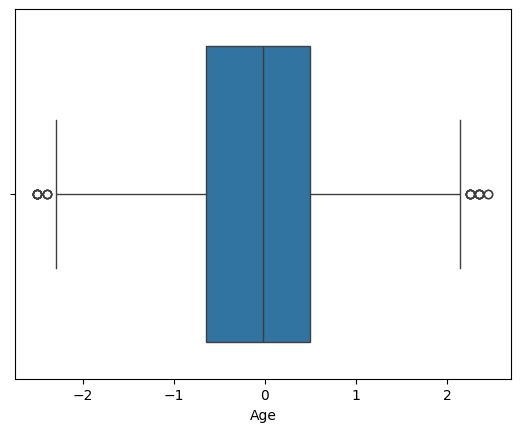

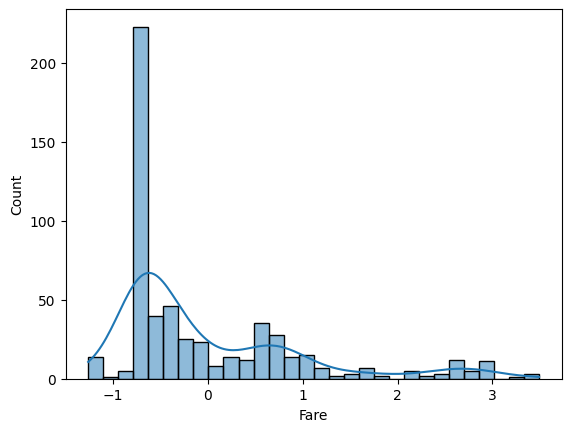

In [29]:
# Boxplot for Age
sns.boxplot(x=X_train_df['Age'])
plt.show()

# Histogram for Fare
sns.histplot(X_train_df['Fare'], bins=30, kde=True)
plt.show()

In [26]:
df.to_csv('titanic_preprocessed.csv', index=False)
print("Saved titanic_preprocessed.csv")

Saved titanic_preprocessed.csv
